In [1]:
from PIL import Image
import cv2 
import numpy as np
from IPython.display import display

In [2]:
import glob, os

laser_samples = []
os.chdir("../res/laser_samples/")
for file in glob.glob("*"):
    laser_samples.append(file)

In [3]:
def disp_file(path):
    # In OpenCV, images are in BGR
    # In Pillow, images are in RGB 
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(img))


# Display cv2 image
def disp_img(cv_img):
    cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(cv_img))


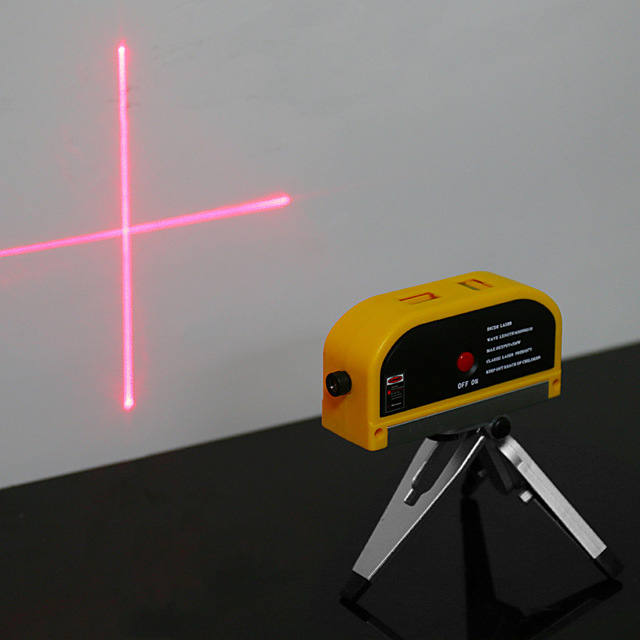

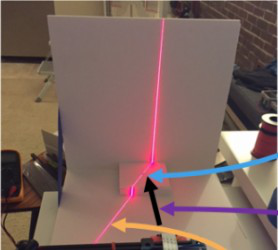

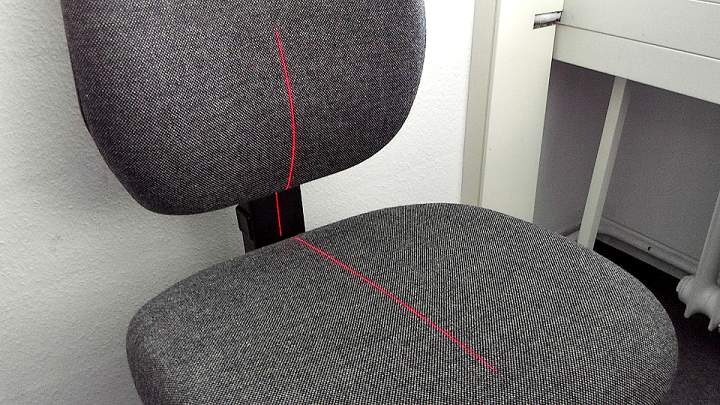

In [4]:
for file in laser_samples:
    disp_file(path=file)

## Idea 1. HSV Isolation
Manually tune the lower and upper bounds of HSV values to obtain laser line

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, HBox

In [6]:
@interact
def hsv_isolation(lh=(0,255), ls=(0,255), lv=(0,255), uh=(0,255), us=(0,255), uv=(0,255)):
    img = cv2.imread(laser_samples[1])

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_colour = np.array([lh, ls, lv])
    upper_colour = np.array([uh, us, uv])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_colour, upper_colour)
    # inv = cv2.bitwise_not(mask)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)

    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

    display(Image.fromarray(res))


interactive(children=(IntSlider(value=127, description='lh', max=255), IntSlider(value=127, description='ls', …

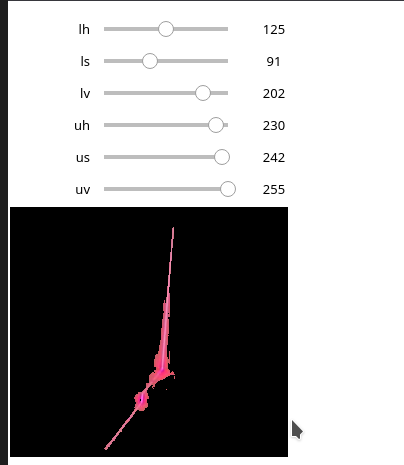

In [7]:
@interact
def hsv_isolation(lh=(0,255), ls=(0,255), lv=(0,255), uh=(0,255), us=(0,255), uv=(0,255)):
    img = cv2.imread(laser_samples[0])

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_colour = np.array([lh, ls, lv])
    upper_colour = np.array([uh, us, uv])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_colour, upper_colour)
    # inv = cv2.bitwise_not(mask)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)

    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

    display(Image.fromarray(res))

interactive(children=(IntSlider(value=127, description='lh', max=255), IntSlider(value=127, description='ls', …

## Idea 2. Subtraction method


## Idea 3. Gradients

## Idea 4. Skeletionization

In [8]:
@interact
def skeletonize(thresh=(0,255)):
    # grab the grayscale image
    img = cv2.imread(laser_samples[0],0) 
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)
    
    # Convert to binary image
    ret,img = cv2.threshold(img,thresh,255,0)
    # cross shaped kernel
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    while(not done):
        # Erosion: if any of the values in the kernel space have zero, the output pixel is 0
        #      Erosion removes tiny specks of noise and makes the area of interst thinner 
        # Dilation: if any of the values in the kernel space have one, then the output pixel is 1
        #      Dilation fills in holes 
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()
        
        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
            
    display(Image.fromarray(skel))


interactive(children=(IntSlider(value=127, description='thresh', max=255), Output()), _dom_classes=('widget-in…

## Pipeline 1. GaussianBlur --> HSV Thresholding --> skeletonization

In [15]:
@interact
def pipeline1(lh=(0,255), ls=(0,255), lv=(0,255), uh=(0,255), us=(0,255), uv=(0,255), thresh=(0,255)):
    img = cv2.imread(laser_samples[0])
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = cv2.GaussianBlur(hsv,(5,5),cv2.BORDER_DEFAULT)
    # define range of blue color in HSV
    lower_colour = np.array([lh, ls, lv])
    upper_colour = np.array([uh, us, uv])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_colour, upper_colour)
    # inv = cv2.bitwise_not(mask)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)

    img = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

    # grab the grayscale image
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    # Convert to binary image
    ret,img = cv2.threshold(img,172,255,0)
    # cross shaped kernel
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    while(not done):
        # Erosion: if any of the values in the kernel space have zero, the output pixel is 0
        #      Erosion removes tiny specks of noise and makes the area of interst thinner 
        # Dilation: if any of the values in the kernel space have one, then the output pixel is 1
        #      Dilation fills in holes 
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True

    display(Image.fromarray(skel))

interactive(children=(IntSlider(value=127, description='lh', max=255), IntSlider(value=127, description='ls', …

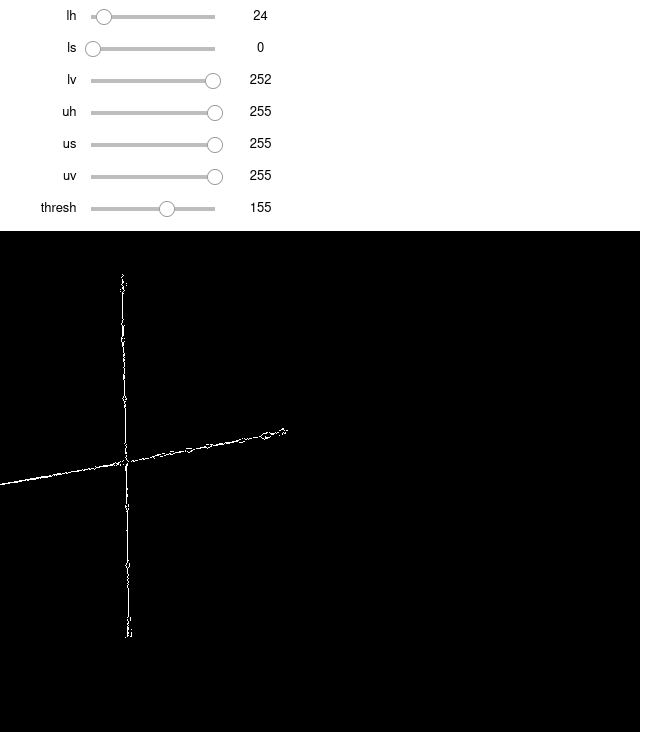